43 Numeric Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



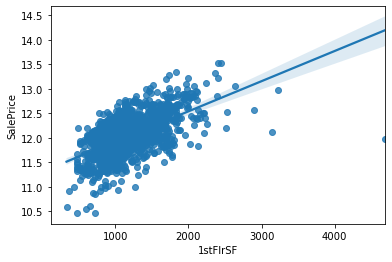

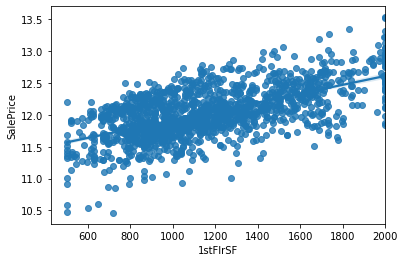

0.8765658386597911


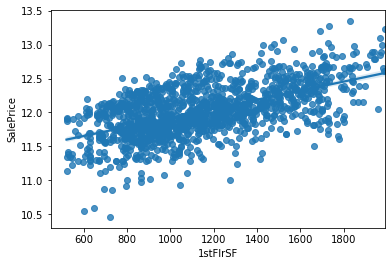

0.8855093878832034


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df=pd.read_csv(r"C:\Users\QQ\Desktop\training data\house train.csv")
# print(df.head())
# print(df.shape)

dY=np.log1p(df["SalePrice"])
df=df.drop(["Id","SalePrice"], axis=1)#drop是函數()!
# print(df.head())
# print(df.shape)

# 削減文字型欄位, 只剩數值型欄位
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype != 'float64' and dtype != 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

df=df.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
           ,axis=1)
df.head()
# print(df.shape)
# dY2 = dY.shape[0]
# print(dY)

# # 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df["1stFlrSF"][:dY2], y = dY)
plt.show()

# 做線性迴歸, 觀察分數
MMEncoder = MinMaxScaler()
df = df.fillna(0)
dX = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator,dX,dY, cv=5).mean()

#第一題
df['1stFlrSF'] = df['1stFlrSF'].clip(500, 2000)
#np.clip()也就是说，截取的意思，超出的部分就把它强置为边界部分。
# Given an interval, values outside the interval are clipped to the interval edges. For example,
# if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
sns.regplot(x = df['1stFlrSF'], y=dY)
plt.show()
# 做線性迴歸, 觀察分數
dX = MMEncoder.fit_transform(df)
estimator = LinearRegression()
print(cross_val_score(estimator,dX,dY, cv=5).mean())

#第二題
z= (df['1stFlrSF']> 500) & (df['1stFlrSF']< 2000)
df = df[z]
dY = dY[z]
sns.regplot(x = df['1stFlrSF'], y=dY)
plt.show()

# 做線性迴歸, 觀察分數
dX = MMEncoder.fit_transform(df)
estimator = LinearRegression()
print(cross_val_score(estimator,dX,dY, cv=5).mean())
